# 문제 01 유형(DataSet_01.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 4,572 Rows, 5 Columns, UTF-8 인코딩
# 
# 글로벌 전자제품 제조회사에서 효과적인 마케팅 방법을 찾기
# 위해서 채널별 마케팅 예산과 매출금액과의 관계를 분석하고자
# 한다.
# 컬 럼 / 정 의  /   Type
# TV   /     TV 마케팅 예산 (억원)  /   Double
# Radio / 라디오 마케팅 예산 (억원)  /   Double
# Social_Media / 소셜미디어 마케팅 예산 (억원)  / Double
# Influencer / 인플루언서 마케팅
# (인플루언서의 영향력 크기에 따라 Mega / Macro / Micro / 
# Nano) / String

# SALES / 매출액 / Double
# =============================================================================

In [2]:
import pandas as pd
import numpy as np

C:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
data1=pd.read_csv('../Dataset/Dataset_01.csv')

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [6]:
data1.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

## sklearn 패키지 사용시 주의점

- 기본적으로 numpy 구조 사용
- 수치형 데이터만 입력
- 행렬 곱 연산 수행하기 위해 2D 
- 결측치가 없어야 함

## statsmodels 패키지 사용 시 주의점

- 기본적으로 DataFrame 구조 사용



In [ ]:
# =============================================================================
# 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23
# =============================================================================

In [7]:
data1.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [8]:
dir(data1)

['Influencer',
 'Radio',
 'Sales',
 'Social_Media',
 'T',
 'TV',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__'

In [11]:
# 결측치 수 확인
data1.isnull().sum().sum()

26

In [13]:
# 결측치 위치/보정 확인 


data1[data1.TV.isnull()]


,TV,Radio,Social_Media,Influencer,Sales
13,NaN,22.351667,3.031815,Mega,276.165351
26,NaN,34.111674,4.624148,Nano,342.913372
46,NaN,34.859637,7.781417,Mega,318.969784
75,NaN,6.482293,0.866845,Macro,91.177216
99,NaN,7.635819,1.554146,Macro,56.186730
119,NaN,30.470485,6.806919,Micro,336.818690
141,NaN,9.164464,1.096681,Macro,65.259189
163,NaN,38.118424,6.676611,Micro,328.555184
183,NaN,1.287060,0.396179,Macro,56.545293
210,NaN,17.007075,5.199635,Macro,208.816382


In [ ]:
# =============================================================================
# 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을
# 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다. 
# - 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오. (답안 예시) 0.1234
# =============================================================================

In [14]:
import seaborn as se

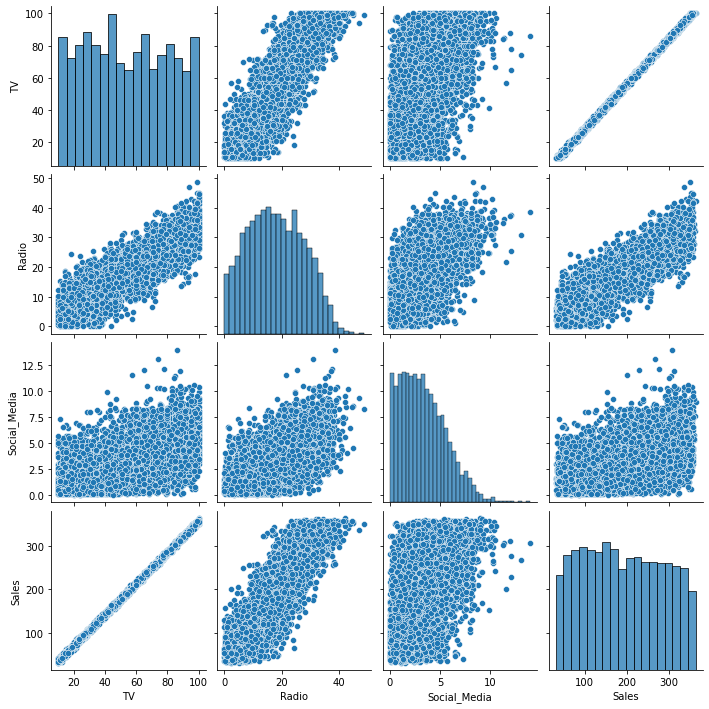

In [16]:
se.pairplot(data1)

In [17]:
# 상관계수
data1.corr()

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


In [20]:
q1_2=data1.corr()['Sales'].drop('Sales').abs()

In [22]:
q1_2.max()  # 최대값

0.999497444941335

In [23]:
# 최대값이 있는 위치번호 호출

q1_2.argmax()

0

In [24]:
# 최대값이 있는 인덱스명 호출

q1_2.idxmax()

'TV'

In [26]:
# 상관계수가 높은 상위 2개 변수
q1_2.nlargest(2).index

Index(['TV', 'Radio'], dtype='object')

- 답

In [27]:
round(q1_2.max(),4) 

0.9995

In [32]:
# 절단
np.trunc(q1_2.max()*10000) / 10000

0.9994

In [33]:
# 내림
np.floor(q1_2.max()*10000) / 10000

0.9994

In [34]:
# 올림
np.ceil(q1_2.max()*10000) / 10000

0.9995

In [36]:
import scipy.stats as sc

In [38]:
?sc.pearsonr

In [41]:
sc.ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')>

In [42]:
# sc.pearsonr(data1.TV, data1.Radio)

In [ ]:
# =============================================================================
# 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을
# 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로
# 기술하시오. 
# - 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리
# 이하는 버리고 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

In [44]:
# sklearn

from sklearn.linear_model import LinearRegression

var_list=['TV', 'Radio', 'Social_Media']


In [46]:
lm=LinearRegression(fit_intercept=True)  # 결측치 존재로 작동 안됨
#lm.fit(data1[var_list], data1['Sales'])

In [47]:
# 결측치 제거
lm1=LinearRegression()

q1_3=data1.dropna()

lm1.fit(q1_3[var_list], q1_3['Sales'])

LinearRegression()

In [48]:
lm1.coef_   # 회귀계수

array([ 3.56256963, -0.00397039,  0.00496402])

In [49]:
lm1.intercept_  # 상수항

-0.13396305194211777

In [58]:
q1_3_df1=pd.Series(lm1.coef_, index=var_list)

In [59]:
q1_3_df1

TV              3.562570
Radio          -0.003970
Social_Media    0.004964
dtype: float64

 - 답

In [61]:
np.trunc(q1_3_df1.sort_values(ascending=False) * 1000) / 1000

TV              3.562
Social_Media    0.004
Radio          -0.003
dtype: float64

## 참고자료

In [51]:
q1_3['TV'].ndim

1

In [52]:
q1_3['TV'].shape

(4546,)

In [53]:
type(q1_3['TV'].values)

numpy.ndarray

In [54]:
q1_3['TV'].values.reshape(-1,1)

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

In [56]:
q1_3[['TV']].ndim

2

In [57]:
lm2=LinearRegression() # 2D 오류 : 입력 1D

# lm2.fit(q1_3['TV'], q1_3['Sales'])

# 입력 변수 2D로 전환
lm2.fit(q1_3[['TV']], q1_3['Sales'])

LinearRegression()

In [ ]:
# statsmodels

# 문제 02 유형(DataSet_02.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
# 
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String
# =============================================================================
# =============================================================================

In [1]:
import pandas as pd
import numpy as np

C:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
data2=pd.read_csv('../Dataset/Dataset_02.csv')

In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
data2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
# =============================================================================
# 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
# 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
# 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

In [8]:
q2_1=data2[['Sex', 'BP', 'Cholesterol']].value_counts(normalize=True)
q2_1

Sex  BP      Cholesterol
F    HIGH    NORMAL         0.105
M    HIGH    NORMAL         0.105
     LOW     NORMAL         0.095
     NORMAL  HIGH           0.095
F    NORMAL  HIGH           0.090
M    HIGH    HIGH           0.090
F    HIGH    HIGH           0.085
M    LOW     HIGH           0.085
F    LOW     HIGH           0.070
             NORMAL         0.070
     NORMAL  NORMAL         0.060
M    NORMAL  NORMAL         0.050
dtype: float64

In [9]:
type(q2_1)

pandas.core.series.Series

In [10]:
q2_1.index

MultiIndex([('F',   'HIGH', 'NORMAL'),
            ('M',   'HIGH', 'NORMAL'),
            ('M',    'LOW', 'NORMAL'),
            ('M', 'NORMAL',   'HIGH'),
            ('F', 'NORMAL',   'HIGH'),
            ('M',   'HIGH',   'HIGH'),
            ('F',   'HIGH',   'HIGH'),
            ('M',    'LOW',   'HIGH'),
            ('F',    'LOW',   'HIGH'),
            ('F',    'LOW', 'NORMAL'),
            ('F', 'NORMAL', 'NORMAL'),
            ('M', 'NORMAL', 'NORMAL')],
           names=['Sex', 'BP', 'Cholesterol'])

- 답

In [11]:
q2_1[('F',   'HIGH', 'NORMAL')]

0.105

## 참고자료

In [12]:
q2_1.droplevel(1)

Sex  Cholesterol
F    NORMAL         0.105
M    NORMAL         0.105
     NORMAL         0.095
     HIGH           0.095
F    HIGH           0.090
M    HIGH           0.090
F    HIGH           0.085
M    HIGH           0.085
F    HIGH           0.070
     NORMAL         0.070
     NORMAL         0.060
M    NORMAL         0.050
dtype: float64

In [13]:
q2_1.reset_index()

,Sex,BP,Cholesterol,0
0,F,HIGH,NORMAL,0.105
1,M,HIGH,NORMAL,0.105
2,M,LOW,NORMAL,0.095
3,M,NORMAL,HIGH,0.095
4,F,NORMAL,HIGH,0.090
5,M,HIGH,HIGH,0.090
6,F,HIGH,HIGH,0.085
7,M,LOW,HIGH,0.085
8,F,LOW,HIGH,0.070
9,F,LOW,NORMAL,0.070


In [14]:
# q2_1=q2_1.reset_index(drop=True)
# q2_1.reset_index(drop=True, inplace=True)

q2_1.reset_index(drop=True)

0     0.105
1     0.105
2     0.095
3     0.095
4     0.090
5     0.090
6     0.085
7     0.085
8     0.070
9     0.070
10    0.060
11    0.050
dtype: float64

In [ ]:
# =============================================================================
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456
# =============================================================================


In [15]:
q2_2=data2.copy()

In [16]:
# Age_gr

# np.where(조건) # 조건에 해당하는 위치번호 리턴
# np.where(조건, 참인경우 실행문, 거짓인경우 실행문) # 조건에 따라 분기해서 처리후 결합해서 데이터셋 리턴

q2_2['Age_gr']=np.where(q2_2.Age < 20, 10, 
                  np.where(q2_2.Age < 30, 20,
                     np.where(q2_2.Age < 40, 30,
                        np.where(q2_2.Age < 50, 40,
                           np.where(q2_2.Age < 60, 50, 60)))))

In [ ]:
q2_2['Age_gr']= np.where(q2_2.Age.isna(), q2_2.Age,
                    np.where(q2_2.Age < 20, 10, 
                      np.where(q2_2.Age < 30, 20,
                         np.where(q2_2.Age < 40, 30,
                            np.where(q2_2.Age < 50, 40,
                               np.where(q2_2.Age < 60, 50, 60))))))

In [17]:
# Na_K_gr

q2_2['Na_K_gr']=np.where(q2_2.Na_to_K <= 10, 'Lv1',
                   np.where(q2_2.Na_to_K <= 20, 'Lv2',
                      np.where(q2_2.Na_to_K <= 30, 'Lv3', 'Lv4')))

In [ ]:
# Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정
# - 두 변수끼리 빈도 작성 -> 작성된 빈도를 입력으로 카이스퀘어 검정을 수행

In [19]:
tab=pd.crosstab(index=q2_2['Sex'], columns=q2_2['Drug'])
tab

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


In [20]:
from scipy.stats import chi2_contingency  # 카이스퀘어 검정

In [23]:
chi_out=chi2_contingency(tab)
chi_out

(2.119248418109203,
 0.7138369773987128,
 4,
 array([[43.68, 11.04,  7.68,  7.68, 25.92],
        [47.32, 11.96,  8.32,  8.32, 28.08]]))

In [25]:
pvalue=chi_out[1]
pvalue

0.7138369773987128

In [ ]:
# Sex, BP, Cholesterol, Age_gr, Na_K_gr 반복적으로 카이스퀘어 검정 수행

In [26]:
for_list=['Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr']

In [27]:
q2_2_sel_var=[]

for i in for_list:
    tab=pd.crosstab(index=q2_2[i], columns=q2_2['Drug'])
    chi_out=chi2_contingency(tab)
    pvalue=chi_out[1]
    q2_2_sel_var.append([i, pvalue])

In [28]:
q2_2_sel_var

[['Sex', 0.7138369773987128],
 ['BP', 5.0417334144665895e-27],
 ['Cholesterol', 0.0005962588389856497],
 ['Age_gr', 0.0007010113024729462],
 ['Na_K_gr', 1.1254641594413981e-14]]

In [29]:
# H0: 독립이다
# H1: 독립이 아니다(연관성이 있다)

q2_2_sel_var=pd.DataFrame(q2_2_sel_var, columns=['var','pvalue'])
q2_2_sel_var

,var,pvalue
0,Sex,7.138370e-01
1,BP,5.041733e-27
2,Cholesterol,5.962588e-04
3,Age_gr,7.010113e-04
4,Na_K_gr,1.125464e-14


In [33]:
# q2_2_out=q2_2_sel_var.loc[q2_2_sel_var.pvalue < 0.05,'var']
q2_2_out=q2_2_sel_var[q2_2_sel_var.pvalue < 0.05]
q2_2_out

,var,pvalue
1,BP,5.041733e-27
2,Cholesterol,5.962588e-04
3,Age_gr,7.010113e-04
4,Na_K_gr,1.125464e-14


- 답

In [32]:
len(q2_2_out)

4

In [35]:
np.trunc(q2_2_out['pvalue'].max() * 100000) / 100000

0.0007

In [ ]:
# =============================================================================
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오. 
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age, 
# 12.345
# =============================================================================

In [36]:
# 변수 변환

q2_3 = data2.copy()

In [37]:
q2_3['Sex_cd']=np.where(q2_3.Sex == 'M', 0, 1)
q2_3['BP_cd']=np.where(q2_3.BP == 'LOW', 0, np.where(q2_3.BP == 'NORMAL', 1, 2))
q2_3['Ch_cd']=np.where(q2_3.Cholesterol == 'NORMAL', 0, 1)

In [38]:
q2_3['Sex_cd'].value_counts()

0    104
1     96
Name: Sex_cd, dtype: int64

In [39]:
q2_3_var_list=['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']

In [40]:
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_text

In [42]:
dt=DecisionTreeClassifier().fit(q2_3[q2_3_var_list], q2_3['Drug'])

In [44]:
# dir(dt)

In [45]:
dt.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [47]:
import matplotlib.pyplot as plt

[Text(372.0, 391.392, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(310.0, 304.416, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugX'),
 Text(186.0, 217.44, 'BP_cd <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 0, 16, 54]\nclass = drugX'),
 Text(124.0, 130.464, 'Ch_cd <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 0, 16, 18]\nclass = drugX'),
 Text(62.0, 43.488, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 0, 18]\nclass = drugX'),
 Text(186.0, 43.488, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]\nclass = drugC'),
 Text(248.0, 130.464, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 0, 36]\nclass = drugX'),
 Text(434.0, 217.44, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [0, 23, 16, 0, 0]\nclass = drugA'),
 Text(372.0, 130.464, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0, 0, 0]\nclass = drugA'),
 Text(496.0, 130.464, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]\nclass 

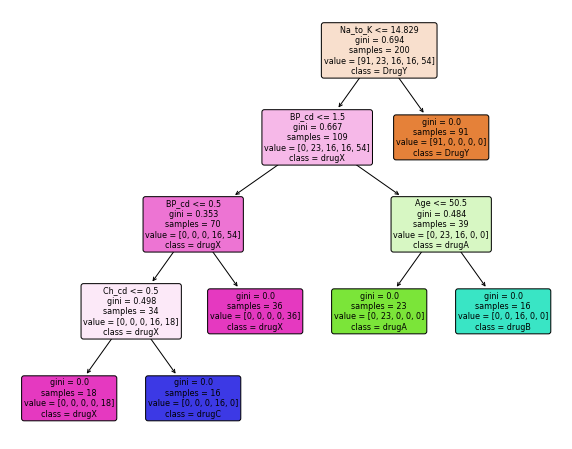

In [50]:
plt.figure(figsize=(10,8))
plot_tree(dt, feature_names=q2_3_var_list, class_names=dt.classes_, 
          filled=True, precision=3, rounded=True, fontsize=8)

In [64]:
print(export_text(dt, feature_names=q2_3_var_list, decimals=3))

|--- Na_to_K <= 14.829
|   |--- BP_cd <= 1.500
|   |   |--- BP_cd <= 0.500
|   |   |   |--- Ch_cd <= 0.500
|   |   |   |   |--- class: drugX
|   |   |   |--- Ch_cd >  0.500
|   |   |   |   |--- class: drugC
|   |   |--- BP_cd >  0.500
|   |   |   |--- class: drugX
|   |--- BP_cd >  1.500
|   |   |--- Age <= 50.500
|   |   |   |--- class: drugA
|   |   |--- Age >  50.500
|   |   |   |--- class: drugB
|--- Na_to_K >  14.829
|   |--- class: DrugY



- 답 : Na_to_K, 14.829

## 참고자료

In [52]:
q2_3_imp=pd.Series(dt.feature_importances_, index=q2_3_var_list)
q2_3_imp

Age        0.135954
Na_to_K    0.476282
Sex_cd     0.000000
BP_cd      0.265718
Ch_cd      0.122046
dtype: float64

In [57]:
q2_3_imp2=q2_3_imp.sort_values(ascending=False)
q2_3_imp2

Na_to_K    0.476282
BP_cd      0.265718
Age        0.135954
Ch_cd      0.122046
Sex_cd     0.000000
dtype: float64

In [60]:
q2_3_imp2.cumsum()

Na_to_K    0.476282
BP_cd      0.742000
Age        0.877954
Ch_cd      1.000000
Sex_cd     1.000000
dtype: float64

In [61]:
q2_3_imp2.index[q2_3_imp2.cumsum() < 0.90]

Index(['Na_to_K', 'BP_cd', 'Age'], dtype='object')

# 문제 03 유형(DataSet_03.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 5,001 Rows, 8 Columns, UTF-8 인코딩
# 안경 체인을 운영하고 있는 한 회사에서 고객 사진을 바탕으로 안경의 사이즈를
# 맞춤 제작하는 비즈니스를 기획하고 있다. 우선 데이터만으로 고객의 성별을
# 파악하는 것이 가능할 지를 연구하고자 한다.
#
# 컬 럼 / 정 의 / Type
# long_hair / 머리카락 길이 (0 – 길지 않은 경우 / 1 – 긴
# 경우) / Integer
# forehead_width_cm / 이마의 폭 (cm) / Double
# forehead_height_cm / 이마의 높이 (cm) / Double
# nose_wide / 코의 넓이 (0 – 넓지 않은 경우 / 1 – 넓은 경우) / Integer
# nose_long / 코의 길이 (0 – 길지 않은 경우 / 1 – 긴 경우) / Integer
# lips_thin / 입술이 얇은지 여부 0 – 얇지 않은 경우 / 1 –
# 얇은 경우) / Integer
# distance_nose_to_lip_long / 인중의 길이(0 – 인중이 짧은 경우 / 1 – 인중이
# 긴 경우) / Integer
# gender / 성별 (Female / Male) / String
# =============================================================================
# =============================================================================

In [65]:
import pandas as pd
import numpy as np

In [66]:
data3=pd.read_csv('../Dataset/Dataset_03.csv')

In [67]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [69]:
data3.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [ ]:
# =============================================================================
# 1.이마의 폭(forehead_width_cm)과 높이(forehead_height_cm) 사이의
# 비율(forehead_ratio)에 대해서 평균으로부터 3 표준편차 밖의 경우를 이상치로
# 정의할 때, 이상치에 해당하는 데이터는 몇 개인가? (답안 예시) 10
# =============================================================================


In [70]:
q3_1=data3.copy()

In [71]:
q3_1['forehead_ratio'] = q3_1['forehead_width_cm'] / q3_1['forehead_height_cm']

In [72]:
xbar=q3_1['forehead_ratio'].mean()
ss=q3_1['forehead_ratio'].std()

In [73]:
xbar, ss

(2.233618718921447, 0.26452529699735255)

In [74]:
UB=xbar + (3 * ss)
LB=xbar - (3 * ss)

In [75]:
(q3_1['forehead_ratio'] > UB) | (q3_1['forehead_ratio'] < LB)

0       False
1       False
2       False
3       False
4       False
        ...  
4996    False
4997    False
4998    False
4999    False
5000    False
Name: forehead_ratio, Length: 5001, dtype: bool

- 답

In [76]:
# 이상치 수
((q3_1['forehead_ratio'] > UB) | (q3_1['forehead_ratio'] < LB)).sum()

3

In [ ]:
# =============================================================================
# 2.성별에 따라 forehead_ratio 평균에 차이가 있는지 적절한 통계 검정을 수행하시오.
# - 검정은 이분산을 가정하고 수행한다.
# - 검정통계량의 추정치는 절대값을 취한 후 소수점 셋째 자리까지 반올림하여
# 기술하시오.
# - 신뢰수준 99%에서 양측 검정을 수행하고 결과는 귀무가설 기각의 경우 Y로, 그렇지
# 않을 경우 N으로 답하시오. (답안 예시) 1.234, Y
# =============================================================================

In [77]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, bartlett, levene

# ttest_1samp: 일표본 t 검정
# ttest_ind: 독립인 이표본 t 검정
# ttest_rel: 대응인 이표본 t 검정
# bartlett, levene: 등분산 검정

In [78]:
q3_1.gender.value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [79]:
g_m=q3_1[q3_1.gender == 'Male' ]['forehead_ratio']
g_f=q3_1[q3_1.gender == 'Female' ]['forehead_ratio']

In [81]:
bar_out=bartlett(g_m, g_f)
bar_out

BartlettResult(statistic=213.42228096491922, pvalue=2.4617792693952707e-48)

In [82]:
bar_out.pvalue

# H0: 등분산이다
# H1: 이분산이다

2.4617792693952707e-48

In [84]:
ttest_out=ttest_ind(g_m, g_f, equal_var=False)
ttest_out

Ttest_indResult(statistic=2.9994984197511543, pvalue=0.0027186702390657176)

In [85]:
round(abs(ttest_out.statistic),3)

2.999

In [86]:
ttest_out.pvalue < 0.01

True

- 답: 2.999, Y

In [ ]:
# =============================================================================
# 3.주어진 데이터를 사용하여 성별을 구분할 수 있는지 로지스틱 회귀분석을 적용하여
# 알아 보고자 한다. 
# - 데이터를 7대 3으로 나누어 각각 Train과 Test set로 사용한다. 이 때 seed는 123으로
# 한다.
# - 원 데이터에 있는 7개의 변수만 Feature로 사용하고 gender를 label로 사용한다.
# (forehead_ratio는 사용하지 않음)
# - 로지스틱 회귀분석 예측 함수와 Test dataset를 사용하여 예측을 수행하고 정확도를
# 평가한다. 이 때 임계값은 0.5를 사용한다. 
# - Male의 Precision 값을 소수점 둘째 자리까지 반올림하여 기술하시오. (답안 예시) 
# 0.12
# 
# 
# (참고) 
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# train_test_split 의 random_state = 123
# =============================================================================

 # 문제 04 유형(DataSet_04.csv 이용)

In [ ]:
# =============================================================================
#구분자 : comma(“,”), 6,718 Rows, 4 Columns, UTF-8 인코딩

# 한국인의 식생활 변화가 건강에 미치는 영향을 분석하기에 앞서 육류
# 소비량에 대한 분석을 하려고 한다. 확보한 데이터는 세계 각국의 1인당
# 육류 소비량 데이터로 아래와 같은 내용을 담고 있다.

# 컬 럼 / 정 의 / Type
# LOCATION / 국가명 / String
# SUBJECT / 육류 종류 (BEEF / PIG / POULTRY / SHEEP) / String
# TIME / 연도 (1990 ~ 2026) / Integer
# Value / 1인당 육류 소비량 (KG) / Double
# =============================================================================
# =============================================================================

# (참고)
# #1
# import pandas as pd
# import numpy as np
# #2
# from scipy.stats import ttest_rel
# #3
# from sklearn.linear_model import LinearRegression

In [ ]:
# =============================================================================
# 1.한국인의 1인당 육류 소비량이 해가 갈수록 증가하는 것으로 보여 상관분석을 통하여
# 확인하려고 한다. 
# - 데이터 파일로부터 한국 데이터만 추출한다. 한국은 KOR로 표기되어 있다.
# - 년도별 육류 소비량 합계를 구하여 TIME과 Value간의 상관분석을 수행하고
# 상관계수를 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지만 기술하시오. 
# (답안 예시) 0.55
# =============================================================================

In [ ]:
# =============================================================================
# 2. 한국 인근 국가 가운데 식생의 유사성이 상대적으로 높은 일본(JPN)과 비교하여, 연도별
# 소비량에 평균 차이가 있는지 분석하고자 한다.
# - 두 국가의 육류별 소비량을 연도기준으로 비교하는 대응표본 t 검정을 수행하시오.
# - 두 국가 간의 연도별 소비량 차이가 없는 것으로 판단할 수 있는 육류 종류를 모두
# 적으시오. (알파벳 순서) (답안 예시) BEEF, PIG, POULTRY, SHEEP
# =============================================================================

In [ ]:
# =============================================================================
# 3.(한국만 포함한 데이터에서) Time을 독립변수로, Value를 종속변수로 하여 육류
# 종류(SUBJECT) 별로 회귀분석을 수행하였을 때, 가장 높은 결정계수를 가진 모델의
# 학습오차 중 MAPE를 반올림하여 소수점 둘째 자리까지 기술하시오. (답안 예시) 21.12
# (MAPE : Mean Absolute Percentage Error, 평균 절대 백분율 오차)
# (MAPE = Σ ( | y - y ̂ | / y ) * 100/n ))
# 
# =============================================================================

# 문제 05 유형(DataSet_05.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 8,068 Rows, 12 Columns, UTF-8 인코딩
#
# A자동차 회사는 신규 진입하는 시장에 기존 모델을 판매하기 위한 마케팅 전략을 
# 세우려고 한다. 기존 시장과 고객 특성이 유사하다는 전제 하에 기존 고객을 세분화하여
# 각 그룹의 특징을 파악하고, 이를 이용하여 신규 진입 시장의 마케팅 계획을 
# 수립하고자 한다. 다음은 기존 시장 고객에 대한 데이터이다.
#

# 컬 럼 / 정 의 / Type
# ID / 고유 식별자 / Double
# Age / 나이 / Double
# Age_gr / 나이 그룹 (10/20/30/40/50/60/70) / Double
# Gender / 성별 (여성 : 0 / 남성 : 1) / Double
# Work_Experience / 취업 연수 (0 ~ 14) / Double
# Family_Size / 가족 규모 (1 ~ 9) / Double
# Ever_Married / 결혼 여부 (Unknown : 0 / No : 1 / Yes : 2) / Double
# Graduated / 재학 중인지 여부 / Double
# Profession / 직업 (Unknown : 0 / Artist ~ Marketing 등 9개) / Double
# Spending_Score / 소비 점수 (Average : 0 / High : 1 / Low : 2) / Double
# Var_1 / 내용이 알려지지 않은 고객 분류 코드 (0 ~ 7) / Double
# Segmentation / 고객 세분화 결과 (A ~ D) / String
# =============================================================================
# =============================================================================


#(참고)
#1
# import pandas as pd
# #2
# from scipy.stats import chi2_contingency
# #3
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# import pydot

In [ ]:
# =============================================================================
# 1.위의 표에 표시된 데이터 타입에 맞도록 전처리를 수행하였을 때, 데이터 파일 내에
# 존재하는 결측값은 모두 몇 개인가? 숫자형 데이터와 문자열 데이터의 결측값을
# 모두 더하여 답하시오.
# (String 타입 변수의 경우 White Space(Blank)를 결측으로 처리한다) (답안 예시) 123
# =============================================================================

In [ ]:
# =============================================================================
# 2.이어지는 분석을 위해 결측값을 모두 삭제한다. 그리고, 성별이 세분화(Segmentation)에
# 영향을 미치는지 독립성 검정을 수행한다. 수행 결과, p-value를 반올림하여 소수점
# 넷째 자리까지 쓰고, 귀무가설을 기각하면 Y로, 기각할 수 없으면 N으로 기술하시오. 
# (답안 예시) 0.2345, N
# =============================================================================

In [ ]:
# =============================================================================
# 3.Segmentation 값이 A 또는 D인 데이터만 사용하여 의사결정 나무 기법으로 분류
# 정확도를
# 측정해 본다. 
# - 결측치가 포함된 행은 제거한 후 진행하시오.
# - Train대 Test 7대3으로 데이터를 분리한다. (Seed = 123)
# - Train 데이터를 사용하여 의사결정나무 학습을 수행하고, Test 데이터로 평가를
# 수행한다.
# - 의사결정나무 학습 시, 다음과 같이 설정하시오:
# • Feature: Age_gr, Gender, Work_Experience, Family_Size, 
#             Ever_Married, Graduated, Spending_Score
# • Label : Segmentation
# • Parameter : Gini / Max Depth = 7 / Seed = 123
# 이 때 전체 정확도(Accuracy)를 소수점 셋째 자리 이하는 버리고 소수점 둘째자리까지
# 기술하시오.
# (답안 예시) 0.12
# =============================================================================